## 03 - Criando uma tabela de frequências

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
dados = pd.DataFrame({'Profissão': [1, 2, 3, 1, 2, 2, 2, 3, 3, 2, 1, 3]})

In [3]:
# # Opção A:
# frequencia = dados['Profissão'].value_counts()
# percentual = dados['Profissão'].value_counts(percent=True) * 100  # 'percent' keyword arg nao exite
# dist_freq_qualitativas = pd.DataFrame({'Frequencia': frequencia, 'Porcentagem (%)': percentual})
# dist_freq_qualitativas.rename(index = {1: 'Estatístico', 2: 'Cientista de Dados', 3: 'Programador Python'}, inplace=True)
# dist_freq_qualitativas.rename_axis('Profissão', axis='columns', inplace=True)
# dist_freq_qualitativas

In [4]:
# Opção B (correta):
frequencia = dados['Profissão'].value_counts()
percentual = dados['Profissão'].value_counts(normalize=True) * 100  
dist_freq_qualitativas = pd.DataFrame({'Frequencia': frequencia, 'Porcentagem (%)': percentual})
dist_freq_qualitativas.rename(index = {1: 'Estatístico', 2: 'Cientista de Dados', 3: 'Programador Python'}, inplace=True)
dist_freq_qualitativas.rename_axis('Profissão', axis='columns', inplace=True)
dist_freq_qualitativas

Profissão,Frequencia,Porcentagem (%)
Cientista de Dados,5,41.666667
Programador Python,4,33.333333
Estatístico,3,25.000000


In [5]:
# Opção C (faltou o label 'profissão' provido pela linha 6):
frequencia = dados['Profissão'].value_counts()
percentual = dados['Profissão'].value_counts(normalize=True) * 100  
dist_freq_qualitativas = pd.DataFrame({'Frequencia': frequencia, 'Porcentagem (%)': percentual})
dist_freq_qualitativas.rename(index = {1: 'Estatístico', 2: 'Cientista de Dados', 3: 'Programador Python'}, inplace=True)
# dist_freq_qualitativas.rename_axis('Profissão', axis='columns', inplace=True)
dist_freq_qualitativas

,Frequencia,Porcentagem (%)
Cientista de Dados,5,41.666667
Programador Python,4,33.333333
Estatístico,3,25.000000


In [6]:
# Opção D (falta a identificação das profissões. Na 5a linha do código, faltou o parâmetro inplace = True):
frequencia = dados['Profissão'].value_counts()
percentual = dados['Profissão'].value_counts(normalize=True) * 100  
dist_freq_qualitativas = pd.DataFrame({'Frequencia': frequencia, 'Porcentagem (%)': percentual})
dist_freq_qualitativas.rename(index = {1: 'Estatístico', 2: 'Cientista de Dados', 3: 'Programador Python'})
dist_freq_qualitativas.rename_axis('Profissão', axis='columns', inplace=True)
dist_freq_qualitativas

Profissão,Frequencia,Porcentagem (%)
2,5,41.666667
3,4,33.333333
1,3,25.000000


# **07 Distribuições de frequência com variáveis quantitativas**

Quando construímos distribuições de frequências com variáveis quantitativas, precisamos, na maior parte dos casos, definir as classes em que desejamos agrupar os nossos dados. O pandas nos oferece a função cut() para realizar esta tarefa.

Analise o seguinte código:

In [7]:
dados = pd.read_csv('dados.csv')

In [8]:
classes = [dados.Altura.min(), 1.65, 1.75, dados.Altura.max()]
labels = ['1 - Baixa', '2 - Média', '3 - Alta']

frequencia = pd.value_counts(
    pd.cut(
        x = dados.Altura,
        bins = classes,
        labels = labels,
        include_lowest = True
    )
)

percentual = pd.value_counts(
    pd.cut(
        x = dados.Altura,
        bins = classes,
        labels = labels,
        include_lowest = True
    ), normalize = True
) * 100

dist_freq_altura = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)

dist_freq_altura.rename_axis('Estaturas', axis= 'columns', inplace = True)

dist_freq_altura.sort_index(ascending = True, inplace = True)

dist_freq_altura

Estaturas,Frequência,Porcentagem (%)
1 - Baixa,20529,26.716554
2 - Média,36162,47.061426
3 - Alta,20149,26.222020


# 03 Calculando a média de uma variável

Utilizando um notebook do Colab e tendo o conjunto de dados abaixo:

In [9]:
dataset = pd.DataFrame({
    'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
    'Idade': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})

Obtenha a média aritmética do data frame.

Observação: Na variável Sexo, 'H' representa os homens e 'M' as mulheres.

In [10]:
dataset.groupby(['Sexo'])['Idade'].mean()  # media das idades por sexo

Sexo
H    45.750000
M    46.333333
Name: Idade, dtype: float64

In [11]:
dataset.Idade.mean()  # media geral passando idade

46.1

In [12]:
dataset.mean()  # media geral sem passar nada

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Idade    46.1
dtype: float64

Considerando o mesmo dataset do exercício anterior, Obtenha a idade média dos homens.

Observação: Na variável Sexo, 'H' representa os homens e 'M' as mulheres.


In [13]:
# Sugestão do exercício:
dataset.groupby('Sexo').mean().loc['H']

Idade    45.75
Name: H, dtype: float64

# 08 Informação mais frequente

Considere o seguinte conjunto de pedidos de um restaurante em um aplicativo de delivery, no período de uma hora:

Pedidos:
Big Mac;
Quarteirão;
Big Mac;
Big Mac;
Cheeseburguer;
Big Mac;
Quarteirão;
Quarteirão;
Mc Fish;
Quarteirão;
Cheeseburguer


In [14]:
sandubas = pd.Series([
                      'Big Mac', 
                      'Quarteirão', 
                      'Big Mac',
                      'Big Mac',
                      'Cheeseburguer',
                      'Big Mac',
                      'Quarteirão',
                      'Quarteirão',
                      'Mc Fish',
                      'Quarteirão',
                      'Cheeseburguer'
])

In [15]:
sandubas

0           Big Mac
1        Quarteirão
2           Big Mac
3           Big Mac
4     Cheeseburguer
5           Big Mac
6        Quarteirão
7        Quarteirão
8           Mc Fish
9        Quarteirão
10    Cheeseburguer
dtype: object

In [16]:
sandubas.mode()

0       Big Mac
1    Quarteirão
dtype: object

# 03 Medidas separatrizes

Seguindo o que aprendemos sobre as medidas separatrizes (quartis, decis e percentis) assinale as opções abaixo que criam uma Series com os decis para a variável Renda, do nosso dataset de aula.

In [17]:
# A criou quartis:
dados.Renda.quantile([0.25, 0.5, 0.75])

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Renda, dtype: float64

In [18]:
# B criou decis usando loop for em list comprehension:
dados.Renda.quantile([i / 10 for i in range(1, 10)])

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Renda, dtype: float64

In [19]:
# C criou decis com lista feita na unha:
dados.Renda.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Renda, dtype: float64

In [20]:
# D criou percentis com loop for e list comprehension:
dados.Renda.quantile([i / 100 for i in range(1, 100)])

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Renda, Length: 99, dtype: float64

# 05 Analisando um boxplot

Considere o seguinte código e o resultado que ele produz:

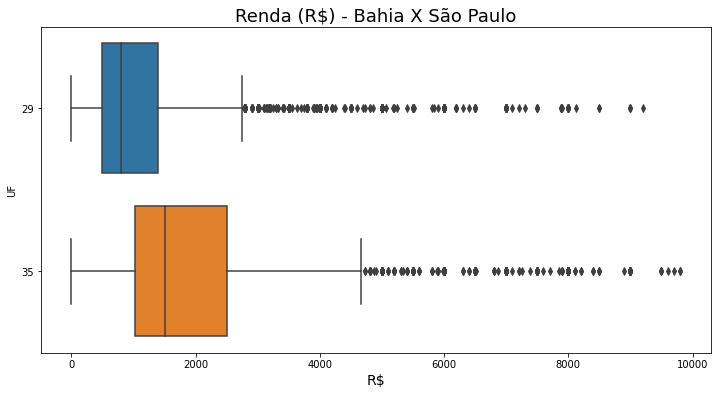

In [21]:
ax = sns.boxplot(x = 'Renda', y = 'UF', data = dados.query('(UF==35 or UF==29) and Renda < 10000'), orient = 'h')

ax.figure.set_size_inches(12, 6)
ax.set_title('Renda (R$) - Bahia X São Paulo', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

Observe que o código de UF igual a 29 representa o estado da Bahia e o de número 35 o estado de São Paulo. Note também que estamos considerando somente as pessoas com rendimento de até R$ 10.000,00.

Com as informações acima, avalie as alternativas abaixo e indique qual é verdadeira.

In [22]:
# Resposta:
# É possível notar que os chefes de domicílio em São Paulo têm uma renda maior que os da Bahia, 
# também notamos uma maior dispersão nos dados de São Paulo.

# 04 Comparando variáveis com mesma média e mediana

Utilizando o DataFrame de exemplo que trabalhamos em nossas aulas:

In [25]:
df = pd.DataFrame(data = {'Fulano': [8, 10, 4, 8, 6, 10, 8],
                          'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]}, 
                  index = ['Matemática', 
                           'Português', 
                           'Inglês', 
                           'Geografia', 
                           'História', 
                           'Física', 
                           'Química'])
df.rename_axis('Matérias', axis = 'columns', inplace = True)
df

Matérias,Fulano,Sicrano
Matemática,8,7.5
Português,10,8.0
Inglês,4,7.0
Geografia,8,8.0
História,6,8.0
Física,10,8.5
Química,8,7.0


O DataFrame acima só considera as notas de Fulano e Sicrano que apresentaram medidas de tendência central idênticas.

Indique a opção que mostra o aluno que possui a maior dispersão em suas notas e o valor do desvio médio absoluto deste aluno, respectivamente:

In [27]:
desvio_medio_absoluto_fulano = df['Fulano'].mad()
desvio_medio_absoluto_fulano

1.5510204081632648

In [29]:
desvio_medio_absoluto_sicrano = df['Sicrano'].mad()
desvio_medio_absoluto_sicrano

0.4693877551020408

O aluno com maior dispersão é Fulano. Seu desvio médio absoluto foi de 1,551020.

# 09 Calculando o desvio padrão #1

Considere o dataset abaixo:

In [30]:
dataset = pd.DataFrame({
    'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
    'Idade': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})

In [31]:
dataset

,Sexo,Idade
0,H,53
1,M,72
2,M,54
3,M,27
4,M,30
5,H,40
6,H,58
7,H,32
8,M,44
9,M,51


Assinale a alternativa que apresenta o valor do desvio padrão da variável Idade:

In [33]:
dataset['Idade'].std()

14.184890239656813

In [34]:
dataset.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Idade    14.18489
dtype: float64

Considere o mesmo dataset do problema anterior:


In [35]:
dataset

,Sexo,Idade
0,H,53
1,M,72
2,M,54
3,M,27
4,M,30
5,H,40
6,H,58
7,H,32
8,M,44
9,M,51


Assinale a alternativa que apresenta o valor do desvio padrão da variável Idade somente para as mulheres:

In [39]:
dataset.groupby(['Sexo'])['Idade'].std()

Sexo
H    11.898879
M    16.645320
Name: Idade, dtype: float64

In [40]:
dataset.groupby(['Sexo']).std().loc['M']

Idade    16.64532
Name: M, dtype: float64